# Evaluation
- Confusion matrix
 -  Example/Excercise of binary classification
 -  Example/Excercise of multi-calss classification
- Classification metrics
 -  Classification metrics for binary classification
 -  Classification metrics for multi-class classification
 -  Micro Average
- Training and test splitting
  - Pitfalls
  - Cross-validation
  - K-fold stratified cross-validation




## Confusion matrix 
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class.

By definition, entry $i$,$j$ in a confusion matrix is the number of observations actually in group $i$, but predicted to be in group $j$. Here is an example:

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

For binary problems, we can get counts of true negatives, false positives, false negatives and true positives as follows:

In [ ]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

### Example/Excercise of binary classification
given the following classsification experimental results, draw the corresponding confusion matrix and calculate the number of: TP,TN,FP,FN:
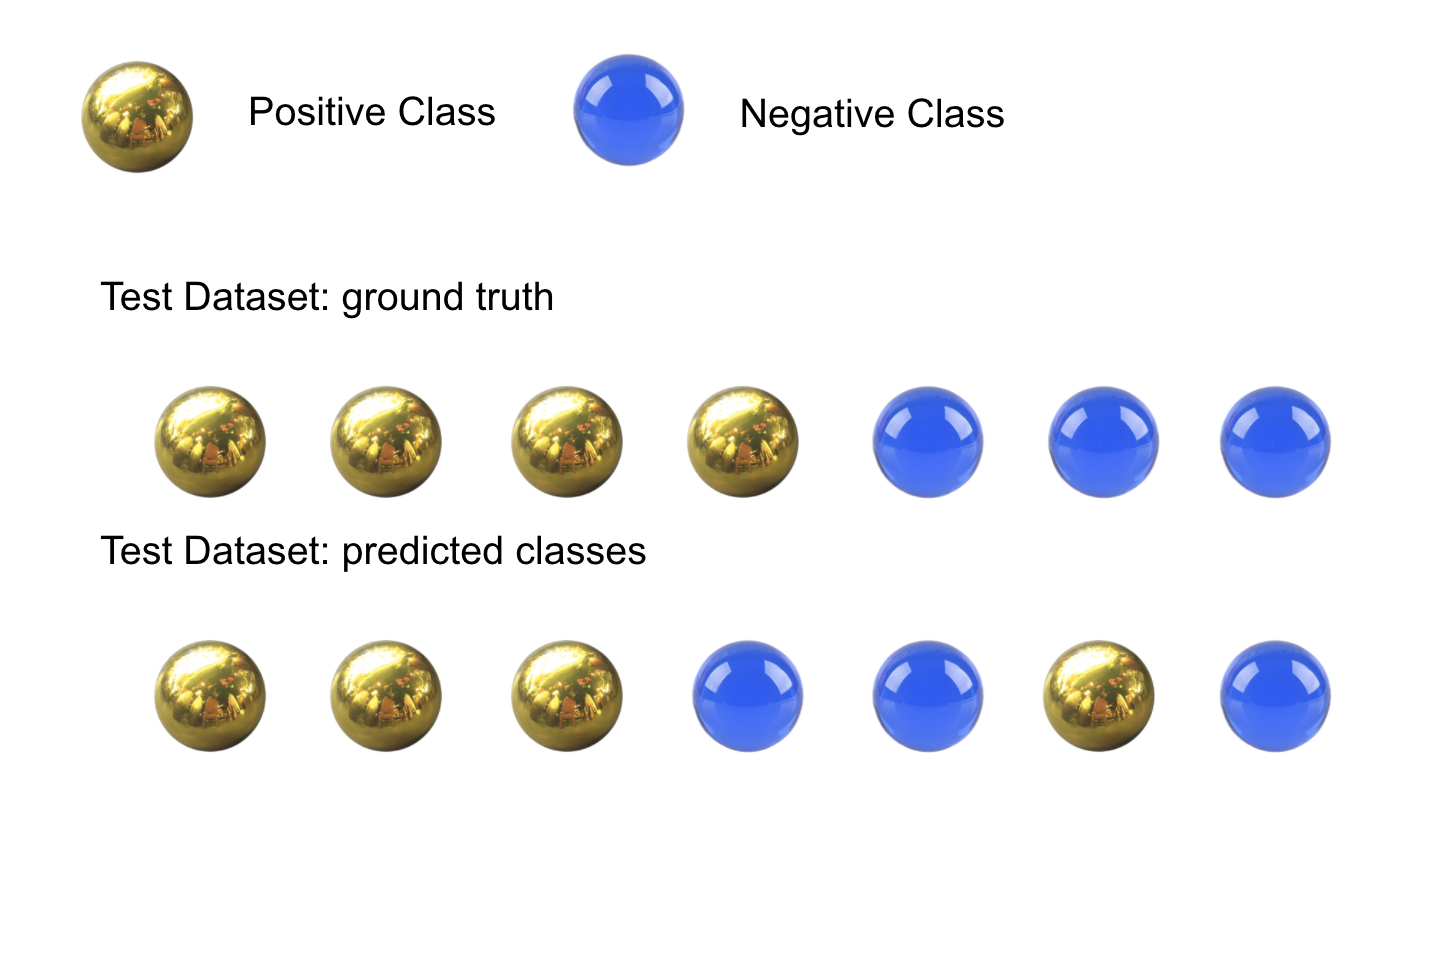





### Example/Excercise of multilabel classification
given the following classsification experimental results, draw the corresponding confusion matrix:
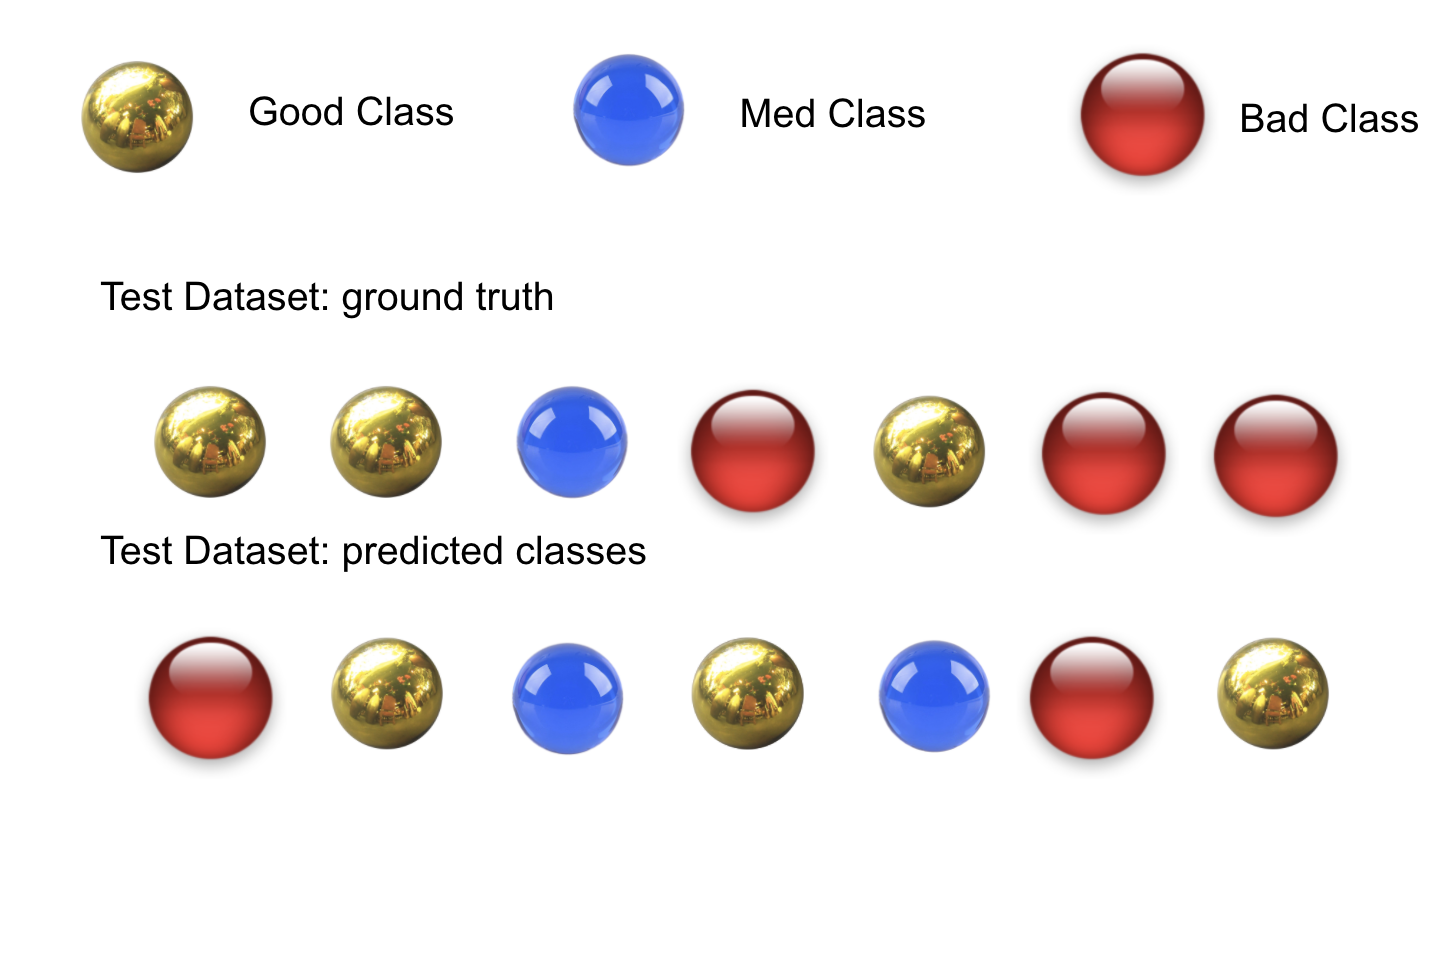

### Classification metrics
$\text{precision} = \frac{TP}{TP + FP}$

$\text{recall} = \frac{TP}{TP + FN}$

$F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$

(in general beta=1)

$\text{accuracy} =  \frac{TP+TN}{TP + FP + TN + FN}$



#### Classification metrics for binary classification
The classification_report function builds a text report showing the main classification metrics. Here is a small example with custom target_names and inferred labels:

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 0, 0, 0]
y_pred = [0, 0, 1, 1, 0]
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.50      0.57         4
     class 1       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.53      0.40      0.46         5



 <span style='color:red'>what macro avg. and weighted avg means? draw the formulas for macro and weigthed P, R, F1?</span>

#### Classification metrics for multi-class classification

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 0, 0, 2]
y_pred = [0, 1, 2, 0, 2]
print(confusion_matrix(y_true, y_pred))
target_names = ['class 0','class 1','class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

[[2 0 1]
 [0 1 0]
 [0 0 1]]
              precision    recall  f1-score   support

     class 0       1.00      0.67      0.80         3
     class 1       1.00      1.00      1.00         1
     class 2       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.83      0.89      0.82         5
weighted avg       0.90      0.80      0.81         5



$\large Precision_{class_i}=\frac{cnf\_matrix_{ii}}{\sum_{j}cnf\_matrix_{ji}}$ <br>
$\large Recall_{class_i}= \frac{cnf\_matrix_{ii}}{\sum_{j}cnf\_matrix_{ij}}$ <br>

- <span style='color:red'>  draw the formulas: macro avg precision,weighted avg recall</span>

- <span style='color:red'>  compute P_{class_0}, R_{class_0}, F1_{class_0}, P_{class_1}, R_{class_1}, F1_{class_1}, P_{class_2}, R_{class_2}, F1_{class_2}</span>


#### Micro Average
In Micro-average method, you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics. For example, for a set of data (or class), the system's

True positive (TP_class1)= 12

False positive (FP_class1)=9

False negative (FN_class1)=3

Then precision (P_class1) and recall (R_class1) will be 57.14 and 80

and for a different set of data (or class), the system's:


True positive (TP_class2)= 50

False positive (FP_class2)=23

False negative (FN_class2)=9

Then precision (P_class2) and recall (R_class2) will be 68.49 and 84.75

Now, the average precision and recall of the system using the Micro-average method is

Micro-average of precision = (TP_class1+TP_class2)/(TP_class1+TP_class2+FP_class1+FP_class_2) = (12+50)/(12+50+9+23) = 65.96

Micro-average of recall = (TP_class1+TP_class2)/(TP_class1+TP_class2+FN_class1+FN_class2) = (12+50)/(12+50+3+9) = 83.78

The Micro-average F-Score will be simply the harmonic mean of these two figures.

## Exercise

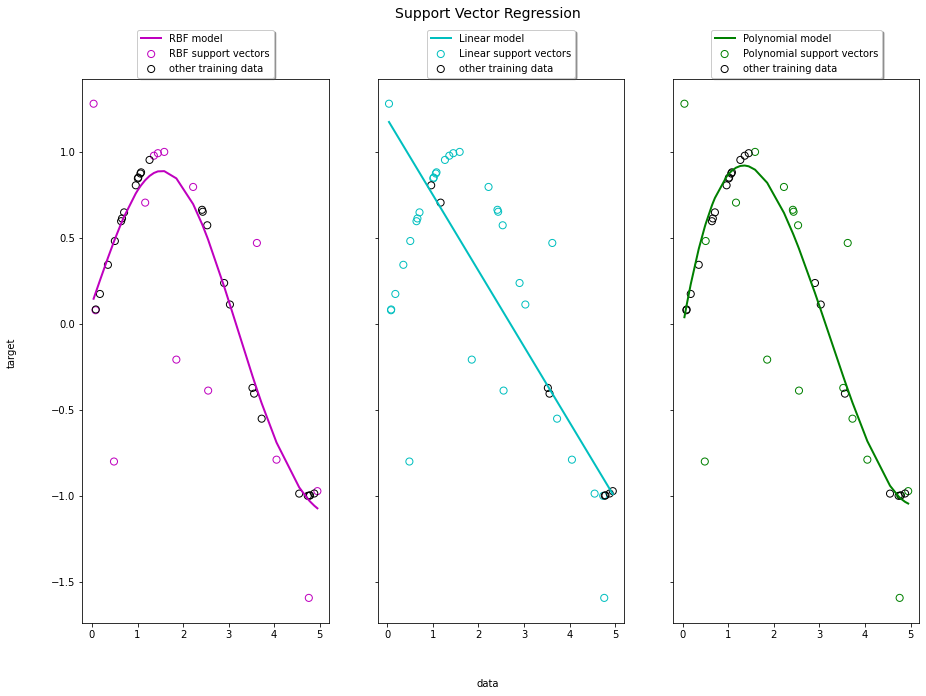

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Training and Test data splitting
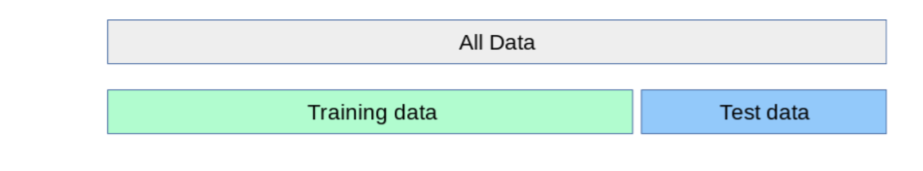
<span style='color:red'>Why is it so important to run training data and test data splitting?</span>

In scikit-learn a random split into training and test sets can be quickly computed with the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split'>train_test_split</a> helper function. Let’s load the iris data set to fit a linear support vector machine on it:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)

In [ ]:
#We can now quickly sample a training set while holding out 40% of the data 
#for testing (evaluating) our classifier:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Training on (X/y)_train and test on (X/Y)_test ...

(90, 4) (90,)
(60, 4) (60,)


**What are the limits of this approach?**


## Cross-validation
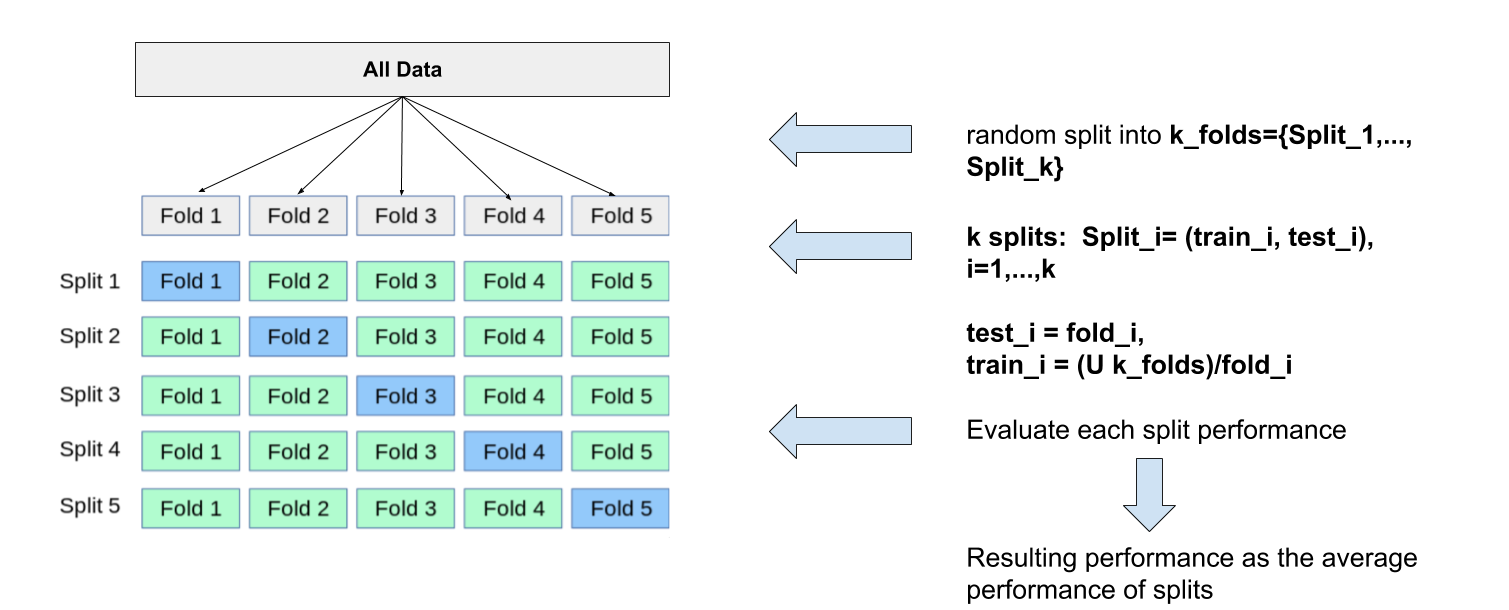
The simplest way to use cross-validation is to call the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score'>cross_val_score</a> helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

The mean score and the 95% confidence interval of the score estimate are hence given by:


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [ ]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
print(sorted(scores.keys()))
print(scores['test_recall_macro'])

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
[0.96666667 1.         0.96666667 0.96666667 1.        ]


See <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter'>scoring parameters</a> for all the possible metrics.

## Stratified cross-validation

In machine learning, When we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model. 
The train_test_split() splits the dataset into training_test and test_set by random sampling.

**What are random sampling and Stratified sampling?** 
Suppose you want to take a survey and decided to call 1000 people from a particular state. You might pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling.
But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female. Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

Why random sampling is not preferred in machine learning? 
Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

**Random sampling:** 
If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

**Stratified Sampling:** 
In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

**What is the solution to mentioned problems?** 
The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling.
The solution for both the first and second problems is to use **Stratified K-Fold Cross-Validation**.

**What is Stratified K-Fold Cross Validation?** 
Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

In [ ]:
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }
  
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

In [ ]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
cancer = datasets.load_breast_cancer()
# Input_x_Features.
x = cancer.data                        
 
# Input_ y_Target_Variable.
y = cancer.target                      
   
  
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9298245614035088, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.9821428571428571]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 92.98245614035088 %

Overall Accuracy: 96.66353383458647 %

Standard Deviation is: 0.02097789213195869
